## CMPINF 2100: Homework 09

### YOUR NAME HERE!!!!

## Assigned: Tuesday of Week 11 at 11:00PM

## DUE: Tuesday of Week 12 at 11:59PM

## Overview

This assignment is focused on interpreting predictive models. The first 4 problems are REGRESSION problems and the last problem is a BINARY CLASSIFICATION problem. The prevailing theme through the assignment is that you will practice working with various features derived from inputs. You will study how these features impact model behavior by examining coefficient summaries and visualizing predictions. The REGRESSION problems involve 2 inputs to give you experience working with ADDITIVE and INTERACTION features. You will also gain experience with CATEGORICAL or NON-NUMERIC inputs in the REGRESSION problems. The BINARY CLASSIFICATION problem involves a single input.

**You must download the 4 data sets provided in the Canvas assignment page and save them to the appropriate directory on your computer.**

The 4 REGRESSION problems use the same column naming convention. The inputs are named `x1` and `x2` while the output (response) is named `y`. Please pay close attention to the DATA TYPE of the inputs in the different problems. The BINARY CLASSICIATION problem uses its own column naming convention. The input is named `x` and the binary outcome (output) is named `y`. Pay close attention to the data type of the columns in the BINARY CLASSIFICATION problem!  

You will NOT perform detailed visual data exploration as part of this assignment. Please note this is **not** because Exploratory Data Analysis (EDA) is not an important aspect of modeling. You should ALWAYS perform EDA **before** modeling. EDA is mostly skipped here because the assignment is focused on fitting and interpreting models. That said, certain problems involve exploratory visualizations to help address important concepts. 

### Collaborators

Shiyi Wang

## Problem 00

### 00a)

You will work with the "big 4" modules of NumPy, Pandas, matplotlib.pyplot, and Seaborn in this assignment.   

Import NumPy, Pandas, matplotlib.pyplot, and Seaborn using their commonly accepted aliases.

#### 00a) - SOLUTION

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 00b)

You will use the statsmodels formula interface to fit the models in all problems. Import the statsmodels.formula.api using its common alias.

**ALL** models that you fit in this assignment will use the statsmodels formula interface!  

#### 00b) - SOLUTION

In [2]:
import statsmodels.formula.api as smf

## Problem 01

This is a REGRESSION problem involving 2 inputs, `x1` and `x2`. The output is named `y`. 

### 1a)

Read in the `hw09_probA.csv` CSV file and assign it to the `dfA` object.

Apply the `.info()` method to display useful information associated with the columns in the data set.

#### 1a) - SOLUTION

In [3]:
dfA = pd.read_csv('./hw09_probA.csv')
dfA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      155 non-null    float64
 1   x2      155 non-null    float64
 2   y       155 non-null    float64
dtypes: float64(3)
memory usage: 3.8 KB


### 1b) 

Visualize the relationship between the output `y` and each input using a TREND PLOT. You may create 2 separate figures OR you may reshape the data to LONG-FORMAT to visualize the TREND PLOTS associated with each input via FACETS.

Regardless of your approach for creating the figures, how would you describe the RELATIONSHIP between the output `y` and each input based on the figure?

#### 1b) - SOLUTION

In [6]:
dfA_lf = dfA.reset_index().\
rename(columns={'index':'row_id'}).\
melt(id_vars=['row_id','y'], value_vars=['x1','x2'])
dfA_lf.head()

,row_id,y,variable,value
0,0,4.014437,x1,-1.479586
1,1,5.407250,x1,-1.494055
2,2,-2.280035,x1,-0.958581
3,3,1.174968,x1,-0.571149
4,4,1.232176,x1,0.683441


c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

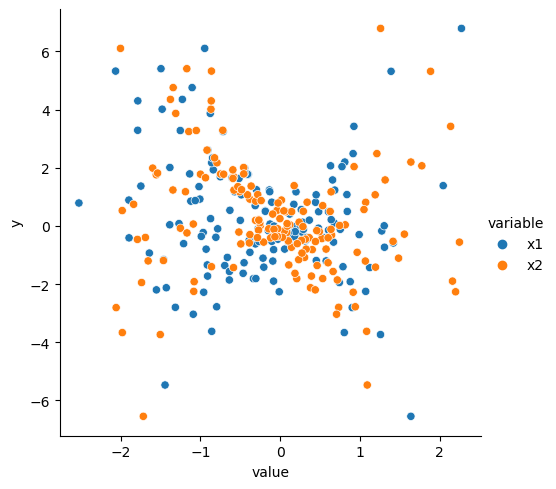

In [7]:
sns.relplot(x='value', y='y', hue='variable', data=dfA_lf)

It does not seems to have a linear relationship between `y` and `x1` or `y` and `x2`.

### 1c)

You will fit many different models in this assignment. It will be helpful to visualize the coefficient summaries with a COEFFICIENT PLOT rather than printing information to the screen.

Previous lecture recordings demonstrated how to create a COEFFICIENT PLOT by defining a function `my_coefplot()`. Define the `my_coefplot()` function in the cell below follwing the example from lecture. You may use the 95% confidence interval approximation based on multiplying 2 times the standard error.

#### 1c) - SOLUTION

In [8]:
def my_coefplot(mod, figsize_use=(10, 4)):
    fig, ax = plt.subplots(figsize=figsize_use)
    
    ax.errorbar( y=mod.params.index,
                 x=mod.params,
                 xerr = 2 * mod.bse,
                 fmt='o', color='k', ecolor='k', elinewidth=2, ms=10)
    
    ax.axvline(x=0, linestyle='--', linewidth=3.5, color='grey')
    
    ax.set_xlabel('coefficient value')
    
    plt.show()

### 1d)

Let's start fitting models to predict the output given the inputs. You will begin by fitting models using a SINGLE input at a time to mirror TREND PLOTS you created in the previous problem.

Fit a linear model that assumes a LINEAR relationship between the AVERAGE OUTPUT (TREND) and `x1` only. Assign the fitted model to the `fit_A_x1` object. 

Display the COEFFICIENT PLOT associated with `fit_A_x1`.

Are you confident in the relationship between the TREND and `x1`?  

#### 1d) - SOLUTION

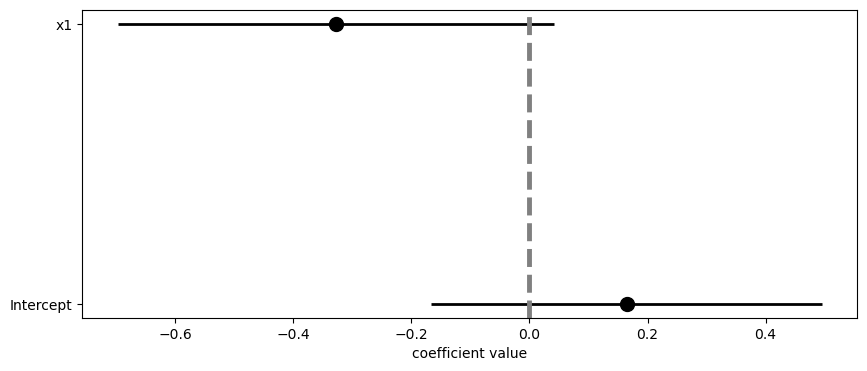

In [9]:
fit_A_x1 = smf.ols(formula='y ~ x1', data=dfA).fit()
my_coefplot(fit_A_x1)

I am not confident in the relationship between the TREND and `x1` because the coefficient confidence interval includes 0.

### 1e)

Fit a linear model that assumes a LINEAR relationship between the AVERAGE OUTPUT (TREND) and `x2` only. Assign the fitted model to the `fit_A_x2` object. 

Display the COEFFICIENT PLOT associated with `fit_A_x2`.

Are you confident in the relationship between the TREND and `x2`? 

#### 1e) - SOLUTION

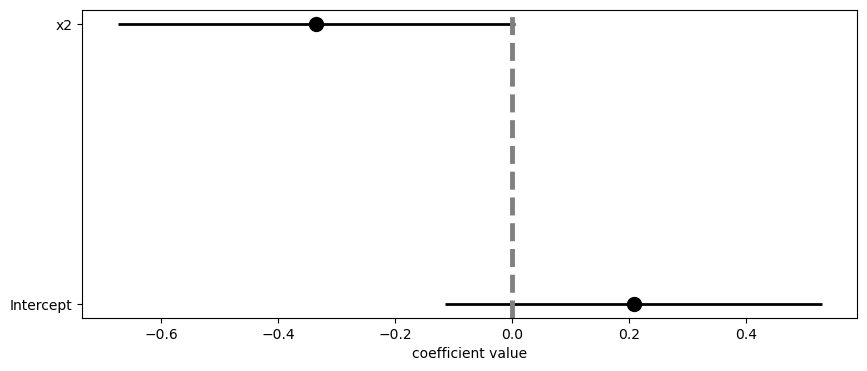

In [10]:
fit_A_x2 = smf.ols(formula='y ~ x2', data=dfA).fit()
my_coefplot(fit_A_x2)

I am not confident in the relationship between the TREND and `x2` because the coefficient confidence interval includes 0.

### 1f)

Let's now fit a model that uses BOTH inputs! Fit a linear model that assumes LINEAR ADDITIVE FEATURES associated with BOTH inputs. Assign the fitted model to the `fit_A_add` object.

Display the COEFFICIENT PLOT associated with `fit_A_add`.

Are you confident in the relationships between the TREND and either input?

#### 1f) - SOLUTION

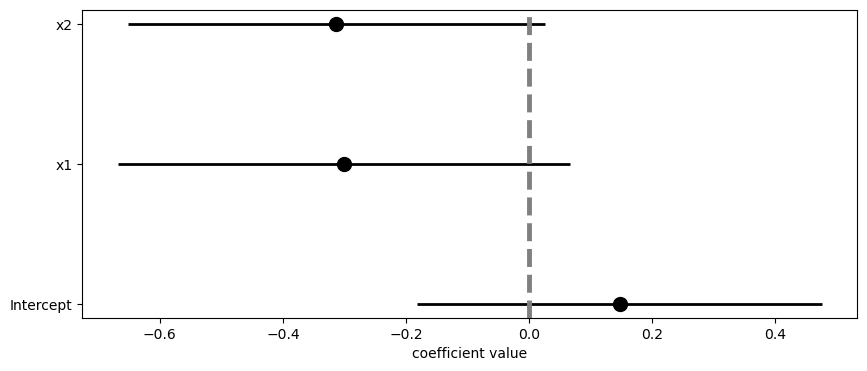

In [11]:
fit_A_add = smf.ols(formula='y ~ x1 + x2', data=dfA).fit()
my_coefplot(fit_A_add)

I am not confident in the relationship between the TREND and either input because the coefficient confidence interval includes 0.

### 1g)

Let's now include an INTERACTION between the TWO inputs. Fit a linear model that involves the LINEAR **main effects** AND the INTERACTION between BOTH inputs. Assign the fitted model to the `fit_A_int` object.

Display the COEFFICIENT PLOT associated with `fit_A_int`.

Are you confident in the relationships between the TREND and any of the FEATURES included in the model?

#### 1g) - SOLUTION

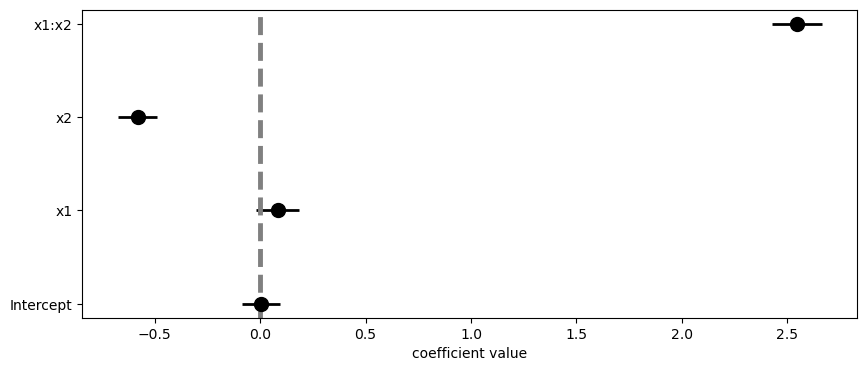

In [12]:
fit_A_int = smf.ols(formula='y ~ x1 * x2', data=dfA).fit()
my_coefplot(fit_A_int)

I am confident about the x1:x2 and x2 coefficients because their confidence intervals do not include 0, while I am not confident about the rest.

### 1h)

You have fit 4 linear models in this problem.

Which of the 4 models has the BEST R-squared on the TRAINING data?

#### 1h) - SOLUTION

In [13]:
# R-squared on training data
for mod in [fit_A_x1, fit_A_x2, fit_A_add, fit_A_int]:
    print(mod.rsquared)

0.020246778739863025
0.024789453386864446
0.041775780318281774
0.9280409411844428


Model `fit_A_int` has the best R-squared on the TRAINING data.

## Problem 02

This problem continues working with the `dfA` data set. You fit 4 models previously, and focused on the behavior through the estimated coefficients. You will continue interpreting the model behavior in this problem but you will do so through predictions. You will only work with the model that included the **main effects** AND INTERACTION between BOTH inputs in this problem.

You visualized model predictions in the previous assignment. To do so, you needed to create a NEW data set which had values to support the predictive visualizations. You will create NEW data sets for this assignment to support visualilzations, BUT these NEW data sets MUST include values for BOTH inputs! This is because the model you working with, `fit_A_int`, has features derived from BOTH inputs. Predictions **cannot** be made if BOTH inputs are **not** present!

### 2a)

You will begin by making predictions that include the predictive TREND, the UNCERTAINTY on the TREND (the confidence interval), and the UNCERTAINTY on a single measurement (the prediction interval). 

You will focus on the relationship between the output and `x2`. Therefore, `x2` will be the "primary" input in the NEW data set and have the most unqiue values. The `x1` input must be set to a CONSTANT value so that way you will visualize a SINGLE set of RIBBONS for the UNCERTAINTY INTERVALS. Inputs held constant are typically set to the TRAINING set MEDIAN or AVERAGE in order to capture the behavior "near the center". 

However, for this assignment you will visualize the predictive behavior with `x1` set to a value away from the CENTER. You will use a value that is HALF WAY between the TRAINING set MAXIMUM and the TRAINING set AVERAGE for `x1`.

Create a NEW Pandas DataFrame, `dfA_viz_a`, that contains a two columns named `x1` and `x2`. The `x2` column must consist of 101 evenly spaced values between the TRAINING set MINIMUM and TRAINING set MAXIMUM `x2` values. The `x1` column must be a CONSTANT value equal to the MIDPOINT (HALF WAY) between the TRAINING set MAXIMUM and the TRAINING set AVERAGE for `x1`. Remember that the training set is contained in the `dfA` DataFrame.

Display the `.nunique()` method associated with `dfA_viz_a` to the screen to confirm it was created correctly.

#### 2a) - SOLUTION

In [14]:
dfA

,x1,x2,y
0,-1.479586,-0.867795,4.014437
1,-1.494055,-1.170365,5.407250
2,-0.958581,0.914539,-2.280035
3,-0.571149,-0.510486,1.174968
4,0.683441,-0.579684,1.232176
...,...,...,...
150,-0.186280,0.289872,0.502756
151,2.271528,1.258143,6.792608
152,0.098209,-1.168417,-0.240408
153,-0.872297,-0.003353,0.250392


In [19]:
dfA_viz_a = pd.DataFrame(
    {'x1': np.mean((np.mean(dfA.x1), np.max(dfA.x1))), 'x2': np.linspace(dfA.x2.min(), dfA.x2.max(), 101)}
)
dfA_viz_a.nunique()

x1      1
x2    101
dtype: int64

### 2b)

Perform the necessary actions to **SUMMARIZE** the predictions associated with `fit_A_int` on the NEW `dfA_viz_a` data set. The predictions must include the predicted MEAN output (the TREND), the confidence interval bounds, and the prediction interval bounds.

Assign the prediction summaries to the `fit_A_pred_summary_a` object.

Display the head of `fit_A_pred_summary_a` object to the screen to confirm it is created correctly.

#### 2b) - SOLUTION

In [29]:
fit_A_pred_summary_a = fit_A_int.get_prediction(dfA_viz_a).summary_frame()
fit_A_pred_summary_a.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-4.133201,0.163476,-4.456197,-3.810206,-5.262349,-3.004053
1,-4.044859,0.160744,-4.362458,-3.727260,-5.172475,-2.917243
2,-3.956516,0.158026,-4.268745,-3.644288,-5.082632,-2.830401
3,-3.868174,0.155323,-4.175060,-3.561288,-4.992819,-2.743528
4,-3.779831,0.152634,-4.081404,-3.478258,-4.903039,-2.656623


### 2c)

You now have everything necessary to visualize the predictions of the `fit_A_int` model on the NEW data, `dfA_viz_a`! You must visualize the predictive trend and BOTH types of uncertainty with respect to the input `x2`.

You must visualize the predicted MEAN output (the trend) as a line. You must visualize the confidence interval as a grey ribbon. You must visualize the prediction interval as an orange ribbon. You do NOT need to include the training set for this problem.

Create the figure using matplotlib methods associated with the matplotlib axis object. Label the x and y axis correctly.

#### 2c) - SOLUTION

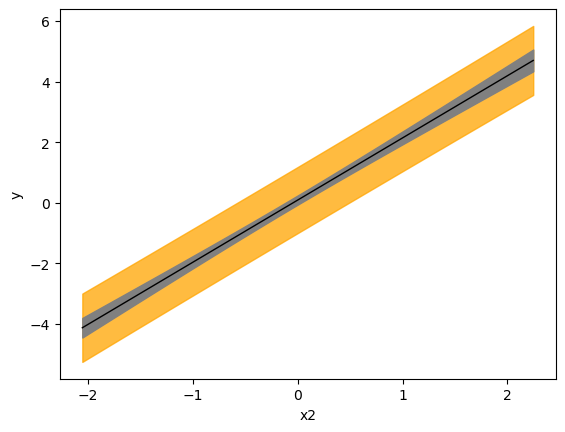

In [31]:
# visualize the predictions using ribbons for uncertainty intervals and lines for the trend
fig, ax = plt.subplots()

# prediction interval
ax.fill_between( dfA_viz_a.x2,
                 fit_A_pred_summary_a.obs_ci_lower, fit_A_pred_summary_a.obs_ci_upper,
                 facecolor='orange', alpha=0.75, edgecolor='orange')

# confidence interval
ax.fill_between( dfA_viz_a.x2,
                 fit_A_pred_summary_a.mean_ci_lower, fit_A_pred_summary_a.mean_ci_upper,
                 facecolor='grey', edgecolor='grey')

# trend
ax.plot( dfA_viz_a.x2, fit_A_pred_summary_a['mean'], color='k', linewidth=1)

# set the labels
ax.set_xlabel('x2')
ax.set_ylabel('y')

# show the plot
plt.show()

### 2d)

The predictions visualized in 2c) consider a wide range of `x2` values **but** are specific to a SINGLE `x1` value! Let's see what happens if you CHANGE `x1` to a different CONSTANT value! The new value of `x1` will be between the MINIMUM and AVERAGE instead of the MAXIMUM and AVERAGE.

Create a NEW Pandas DataFrame, `dfA_viz_b`, that contains a two columns named `x1` and `x2`. The `x2` column must consist of 101 evenly spaced values between the TRAINING set MINIMUM and TRAINING set MAXIMUM `x2` values. The `x1` column must be a CONSTANT value equal to the MIDPOINT (HALF WAY) between the TRAINING set MINIMUM and the TRAINING set AVERAGE for `x1`. Remember that the training set is contained in the `dfA` DataFrame.

Display the `.nunique()` method associated with `dfA_viz_b` to the screen to confirm it was created correctly.

#### 2d) - SOLUTION

In [33]:
dfA_viz_b = pd.DataFrame(
    {'x1': np.mean((np.mean(dfA.x1),np.min(dfA.x1))), 
     'x2': np.linspace(dfA.x2.min(), dfA.x2.max(), 101)}
)
dfA_viz_b.nunique()

x1      1
x2    101
dtype: int64

### 2e)

Perform the necessary actions to **SUMMARIZE** the predictions associated with `fit_A_int` on the second NEW `dfA_viz_b` data set. The predictions must include the predicted MEAN output (the TREND), the confidence interval bounds, and the prediction interval bounds.

Assign the prediction summaries to the `fit_A_pred_summary_b` object.

Display the head of `fit_A_pred_summary_b` object to the screen to confirm it is created correctly.

#### 2e) - SOLUTION

In [34]:
fit_A_pred_summary_b = fit_A_int.get_prediction(dfA_viz_b).summary_frame()
fit_A_pred_summary_b.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,8.224156,0.198924,7.831122,8.617190,7.073016,9.375297
1,8.049784,0.194991,7.664520,8.435047,6.901273,9.198295
2,7.875411,0.191071,7.497892,8.252930,6.729475,9.021347
3,7.701039,0.187165,7.331238,8.070840,6.557622,8.844455
4,7.526666,0.183274,7.164554,7.888778,6.385713,8.667619


### 2f)

You now have everything necessary to visualize the predictions of the `fit_A_int` model on the second NEW data, `dfA_viz_b`! You must visualize the predictive trend and BOTH types of uncertainty with respect to the input `x2`.

You must visualize the predicted MEAN output (the trend) as a line. You must visualize the confidence interval as a grey ribbon. You must visualize the prediction interval as an orange ribbon. You do NOT need to include the training set for this problem.

Create the figure using matplotlib methods associated with the matplotlib axis object. Label the x and y axis correctly.

#### 2f) - SOLUTION

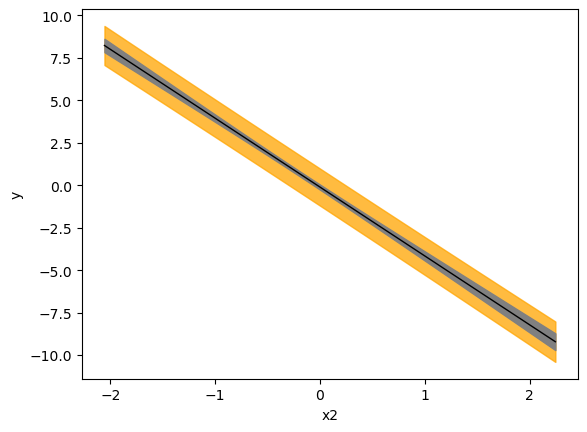

In [35]:
# visualize the predictions using ribbons for uncertainty intervals and lines for the trend
fig, ax = plt.subplots()

# prediction interval
ax.fill_between( dfA_viz_b.x2,
                 fit_A_pred_summary_b.obs_ci_lower, fit_A_pred_summary_b.obs_ci_upper,
                 facecolor='orange', alpha=0.75, edgecolor='orange')

# confidence interval
ax.fill_between( dfA_viz_b.x2,
                 fit_A_pred_summary_b.mean_ci_lower, fit_A_pred_summary_b.mean_ci_upper,
                 facecolor='grey', edgecolor='grey')

# trend
ax.plot( dfA_viz_b.x2, fit_A_pred_summary_b['mean'], color='k', linewidth=1)

# set the labels
ax.set_xlabel('x2')
ax.set_ylabel('y')

# show the plot
plt.show()

### 2g)

The previous figures focused on a SINGLE `x1` value because BOTH types of UNCERTAINTY intervals were included. However, let's now directly examine how `x1` impacts the relationship between the TREND and `x2` by including multiple values of `x1` in the predictions. To do so, you will need to create a third NEW data set that includes multiple values of `x2` AND multiple values of `x1`. The `x2` input will continue to be the primary input and thus have the most unique values.

Create a NEW Pandas DataFrame, `dfA_viz_c`, that contains a two columns named `x1` and `x2`. The `x2` column must consist of 101 evenly spaced values between the TRAINING set MINIMUM and training set MAXIMUM `x2` values. The `x1` column consist of 9 evenly spaced values between the TRAINING set MINIMUM and TRAINING set MAXIMUM `x1` values. Thus, `x1` is NOT constant! Remember that the training set is contained in the `dfA` DataFrame.

Display the `.nunique()` method associated with `dfA_viz_c` to the screen to confirm it was created correctly.

#### 2g) - SOLUTION

In [37]:
dfA_viz_c = pd.DataFrame(
    [ (x1, x2) for x1 in np.linspace(dfA.x1.min(), dfA.x1.max(), 9) 
               for x2 in np.linspace(dfA.x2.min(), dfA.x2.max(), 101) ],
    columns=['x1','x2'])

dfA_viz_c.nunique()

x1      9
x2    101
dtype: int64

### 2h)

You will make predictions for the AVERAGE OUTPUT (TREND) on the NEW `dfA_viz_c` data using the `fit_A_int` model. The UNCERTAINTY INTERVAL bounds are not required for this problem. Therefore, the predictive TREND can be added as a new column to a DataFrame. 

Create a COPY of the `dfA_viz_c` DataFrame named `dfA_viz_copy`. Create a NEW column named `pred` within `dfA_viz_copy` that is assigned the predictive TREND on the NEW `dfA_viz_c` data using the `fit_A_int` model.

Display the head of `dfA_viz_copy` object to the screen to confirm it is created correctly.

#### 2h) - SOLUTION

In [40]:
dfA_viz_copy = dfA_viz_c.copy()
dfA_viz_copy['pred'] = fit_A_int.predict(dfA_viz_c)
dfA_viz_copy.head()

,x1,x2,pred
0,-2.522727,-2.056079,14.204501
1,-2.522727,-2.013054,13.902987
2,-2.522727,-1.970030,13.601473
3,-2.522727,-1.927005,13.299960
4,-2.522727,-1.883981,12.998446


In [46]:
dfA_viz_copy.nunique()

x1        9
x2      101
pred    909
dtype: int64

### 2i)

You now have everything necessary to visualize the predictions of the `fit_A_int` model on the third NEW data, `dfA_viz_c`! You must visualize the predictive trend with respect to the input `x2` for each unique value of `x1`.

You must create the visualization as a LINE chart using Seaborn. The lines must be COLORED by the `x1` variable and you MUST use a DIVERGING color palette. You must set the appropriate arguments to ensure ALL lines are shown.

#### 2i) - SOLUTION

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

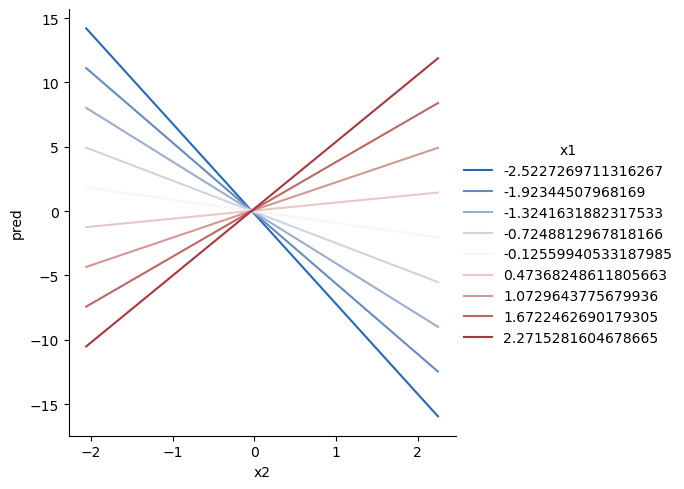

In [56]:
# set 9 colors for the 9 x1 values using icefire palette
sns.relplot(data = dfA_viz_copy, 
            x='x2', y='pred', kind='line',
            hue='x1', palette='vlag',legend='full',
            estimator=None, units='x1')
plt.show()

### 2j)

You have created multiple visualizations to study the predictions from a model that includes an INTERACTION between 2 continuous inputs.

How would you describe the INFLUENCE of `x1` on the RELATIOSHIP between the TREND and `x2` based on your figures?

#### 2j) - SOLUTION

What do you think?

Different x1 changes the slope of line which desribes the relationship between the TREND and x2.

## Problem 03

This is another REGRESSION problem involving 2 inputs, `x1` and `x2`. The output is named `y`. However, this new application involves MIXED inputs! One input is CATEGORICAL (non-numeric) and one input is NUMERIC. You will gain experience working with the MIXED input setting, learning how to visualize the data, interpret the coefficients, and make predictions.

### 3a)

Read in the `hw09_probB.csv` CSV file and assign it to the `dfB` object.

Apply the `.info()` method to display useful information associated with the columns in the data set.

#### 3a) - SOLUTION

In [57]:
dfB = pd.read_csv('./hw09_probB.csv')
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      201 non-null    float64
 1   x2      201 non-null    object 
 2   y       201 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.8+ KB


### 3b)

As mentioned at the start of the assignment, you will NOT perform a detailed visual exploration of the data. However, let's practice using PLOTS that will specifically help you explore the potential influence of the CATEGORICAL input in this regression task.

Create a bar chart that shows the counts for the CATEGORICAL input. You must create the bar chart using Seaborn.

Are the categories roughly balanced?

#### 3b) - SOLUTION

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


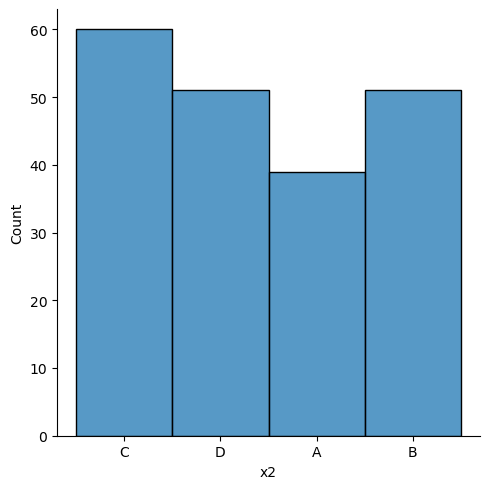

In [61]:
sns.displot(data=dfB, x='x2', kind='hist')

The categories are not balanced. The max count is about 60 and the min count is about 40.

### 3c) 

Create a BOXPLOT to visualize the RELATIONSHIP between the CONTINUOUS output `y` and the CATEGORICAL input.

You must create the BOXPLOT using Seaborn.

#### 3c) - SOLUTION

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

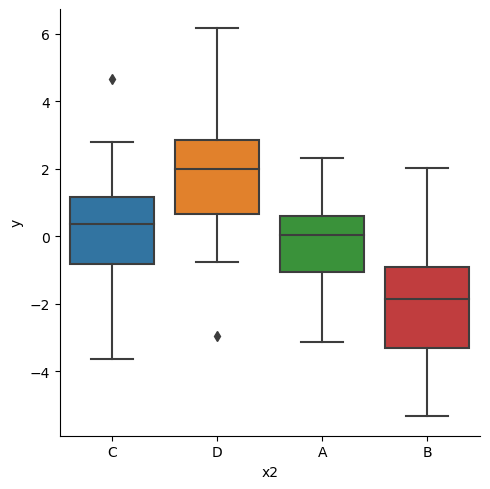

In [67]:
# figure level box plot 
sns.catplot(data=dfB, y='y', x='x2', kind='box')

### 3d)

Create a POINT PLOT to visualize the RELATIONSHIP between the CONTINUOUS output `y` and the CATEGORICAL input.

#### 3d) - SOLUTION

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

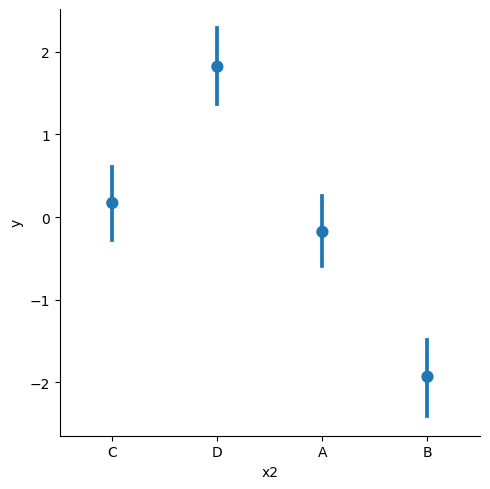

In [72]:
sns.catplot(data=dfB, y='y', x='x2', kind='point',
            join=False)

### 3e)

Let's now examine the RELATIONSHIP between the CONTINUOUS output `y` and the NUMERIC input.

Create a TREND PLOT between the output and the NUMERIC input.

#### 3e) - SOLUTION

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


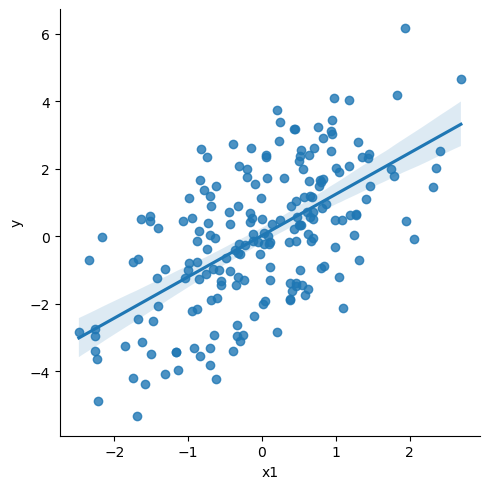

In [76]:
sns.lmplot(data=dfB, y='y', x='x1')

### 3f)

You have visually explored the relationship between the output and EACH input. The previous plots did NOT include BOTH inputs. However, you already know strategies to visually explore if the CATEGORICAL input influences the RELATIONSHIP between the continuous output and numeric input.

Create a TREND PLOT between the CONTINUOUS output `y` and the NUMERIC input which ACCOUNTS for the influence of the CATEGORICAL input.

#### 3f) - SOLUTION

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


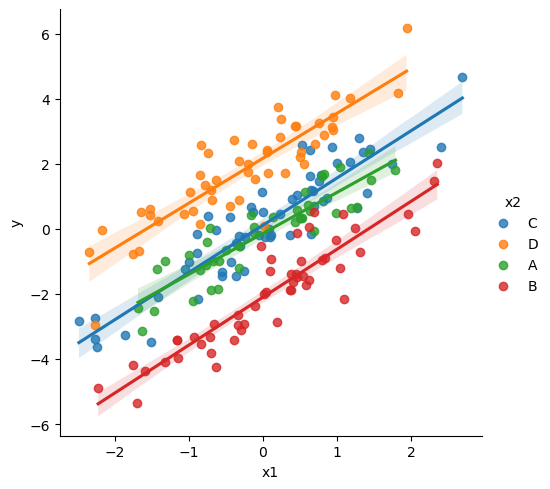

In [122]:
sns.lmplot(data=dfB, y='y', x='x1', hue='x2')

### 3g)

Now that you have some idea about the output to input relationships, let's quantify those effects by fitting a linear model. You will fit a linear model that uses ADDITIVE features for BOTH inputs. Thus, you do not need to fit models with a single input in this problem. You will use BOTH inputs.

Fit a linear model that assumes LINEAR ADDITIVE FEATURES associated with BOTH inputs. Assign the fitted model to the `fit_B` object.

Display the COEFFICIENT PLOT associated with `fit_B`.

#### 3g) - SOLUTION

In [87]:
def my_coefplot(mod, figsize_use=(10, 4)):
    fig, ax = plt.subplots(figsize=figsize_use)
    
    ax.errorbar( y=mod.params.index,
                 x=mod.params,
                 xerr = 2 * mod.bse,
                 fmt='o', color='k', ecolor='k', elinewidth=2, ms=10)
    
    ax.axvline(x=0, linestyle='--', linewidth=3.5, color='grey')
    
    ax.set_xlabel('coefficient value')
    
    plt.show()

In [145]:
fit_B = smf.ols(formula='y ~ x1 + x2', data=dfB).fit()
fit_B.params

Intercept   -0.136616
x2[T.B]     -1.959537
x2[T.C]      0.246470
x2[T.D]      2.311227
x1           1.409862
dtype: float64

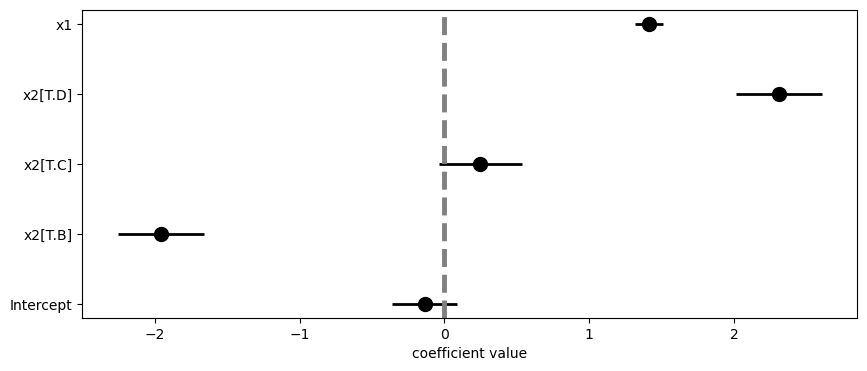

In [146]:
my_coefplot(fit_B)

### 3h)

How many coefficients were estimated for the model that included ADDITIVE features for BOTH inputs in the previous problem?

What conclusions can you draw from the COEFFICIENT plot? Are your conclusions consistent with your visualization in 3f)?

#### 3h) - SOLUTION

What do you think?

5 coefficients were estimated for the model.

The intercept and x2 C estimations are not statistically significant. 

Yes they are consistent. According to the values, the trend line order is B A C D from low to high, and the trend line slope between x1 and y is positive

### 3i)

Let's use predictions to help confirm your statements in 3h). As with the previous problem, predictions require defining a NEW data set. The goal here is to examine the influence of the CATEGORICAL input on the RELATIONSHIP between the output `y` and the NUMERIC (continuous) input. The predictions will include multiple values of the CATEGORICAL input. The visualization will therefore only show the predictive TREND rather than the predictive UNCERTAINTY intervals. (CMPINF 2120 and CMPINF 2130 show how to create figures that include the influence of secondary inputs on predictive uncertainty intervals.)

As in the previous problem, you must begin by defining a NEW data set. This data set will treat the NUMERIC (continuous) input as the primary input with the most unique values. The CATEGORICAL input will serve as the secondary input. The NEW data set must include ALL unique values of the CATEGORICAL input.  

Create a NEW Pandas DataFrame, `dfB_viz`, that contains a two columns with the SAME names as the INPUTS in `dfB`. The NUMERIC (continuous) input must consist of 101 evenly spaced values between the TRAINING set MINIMUM and training set MAXIMUM NUMERIC input values. The CATEGORICAL input must consist of ALL unique values associated with the CATEGORICAL (non-numeric) input. Thus, the CATEGORICAL input is NOT constant! Remember that the training set is contained in the `dfB` DataFrame.

Display the `.nunique()` method associated with `dfB_viz` to the screen to confirm it was created correctly.

#### 3i) - SOLUTION

In [102]:
dfB_viz = pd.DataFrame(
    [ (x1, x2) for x1 in np.linspace(dfB.x1.min(), dfB.x1.max(), 101)
                for x2 in dfB.x2.unique()],
    columns=['x1','x2']
)

dfB_viz.nunique()

x1    101
x2      4
dtype: int64

### 3j)

You will make predictions for the AVERAGE OUTPUT (TREND) on the NEW `dfB_viz` data using the `fit_B` model. The UNCERTAINTY INTERVAL bounds are not required for this problem. Therefore, the predictive TREND can be added as a new column to a DataFrame. 

Create a COPY of the `dfB_viz` DataFrame named `dfB_viz_copy`. Create a NEW column named `pred` within `dfB_viz_copy` that is assigned the predictive TREND on the NEW `dfB_viz` data using the `fit_B` model.

Display the head of `dfB_viz_copy` object to the screen to confirm it is created correctly.

#### 3j) - SOLUTION

In [103]:
dfB_viz_copy = dfB_viz.copy()
dfB_viz_copy['pred'] = fit_B.predict(dfB_viz)
dfB_viz_copy.head()

,x1,x2,pred
0,-2.479837,C,-3.386373
1,-2.479837,D,-1.321615
2,-2.479837,A,-3.632843
3,-2.479837,B,-5.592380
4,-2.428101,C,-3.313434


### 3k)

You now have everything necessary to visualize the predictions of the `fit_B` model on the NEW data, `dfB_viz`! You must visualize the predictive trend with respect to the NUMERIC (continuous) input for each unique value of the CATEGORICAL (non-numeric) input.

You must create the visualization as a LINE chart using Seaborn. The lines must be COLORED by the CATEGORICAL (non-numeric) input. You may use the default color palette. You must set the appropriate arguments to ensure ALL lines are shown.

#### 3k) - SOLUTION

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

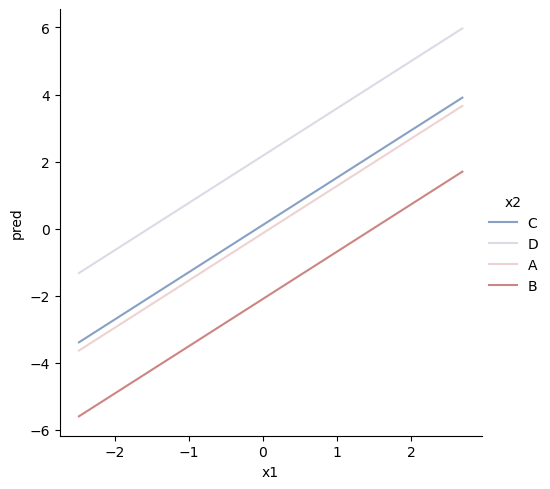

In [161]:
sns.relplot(data = dfB_viz_copy,
            x='x1', y='pred', kind='line',
            hue='x2', palette='vlag',
            estimator=None, units='x2')

### 3l)

Were the "lines" visualized in 3k) consistent with your COEFFICIENT PLOT in 3g) and the colored TREND PLOT in 3f)?

Based on those visualizations, what conclusions can you draw from ADDING a CATEGORICAL input to a CONTINUOUS input?

#### 3l) - SOLUTION

What do you think?

The lines are all consistent with the COEFFICIENT PLOT in 3g) and the colored TREND PLOT in 3f).

Adding a categorical input, we could tell the trend line difference between categories.

If it is an additive feature, the trend line will be parallel.

## Problem 04

This is another REGRESSION problem involving 2 inputs, `x1` and `x2`. The output is named `y`. You will continue working with CATEGORICAL INPUTS. You will repeat many of the actions from Problem 03. However, this time you will not focus on ADDITIVE features. Instead, you will ultimately fit a model that INTERACTS a CATEGORICAL input with a CONTINUOUS input!

### 4a)

Read in the `hw09_probC.csv` CSV file and assign it to the `dfC` object.

Apply the `.info()` method to display useful information associated with the columns in the data set.

#### 4a) - SOLUTION

In [123]:
dfC = pd.read_csv('./hw09_probC.csv')
dfC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      301 non-null    float64
 1   x2      301 non-null    object 
 2   y       301 non-null    float64
dtypes: float64(2), object(1)
memory usage: 7.2+ KB


### 4b)

Let's practice using PLOTS that will specifically help you explore the potential influence of the CATEGORICAL input in this regression task.

Create a bar chart that shows the counts for the CATEGORICAL input. You must create the bar chart using Seaborn.

Are the categories roughly balanced?

#### 4b) - SOLUTION

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

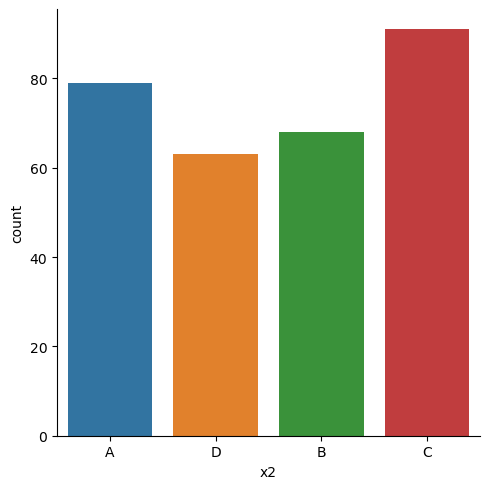

In [151]:
sns.catplot(data=dfC, x='x2', kind='count')

No, the categories are not balanced. The max count is over 80 and the min count is about 60.

### 4c) 

Create a BOXPLOT to visualize the RELATIONSHIP between the CONTINUOUS output `y` and the CATEGORICAL input.

You must create the BOXPLOT using Seaborn.

#### 4c) - SOLUTION

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

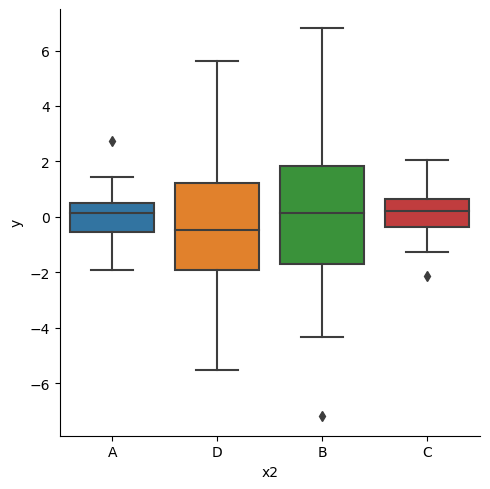

In [152]:
sns.catplot(data=dfC, x='x2', y='y', kind='box')

### 4d)

Create a POINT PLOT to visualize the RELATIONSHIP between the CONTINUOUS output `y` and the CATEGORICAL input.

#### 4d) - SOLUTION

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

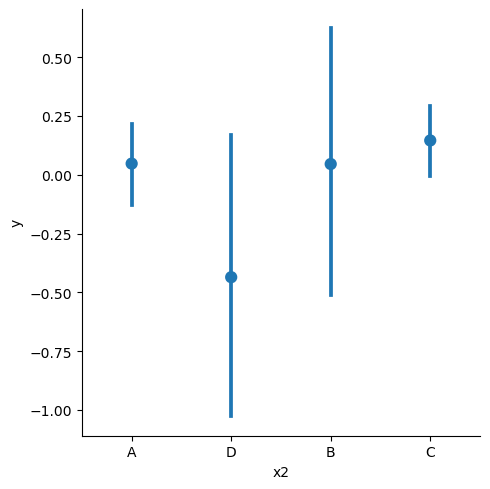

In [153]:
sns.catplot(data=dfC, x='x2', y='y', kind='point',
            join=False)

### 4e)

Let's now examine the RELATIONSHIP between the CONTINUOUS output `y` and the NUMERIC input.

Create a TREND PLOT between the output and the NUMERIC input.

#### 4e) - SOLUTION

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


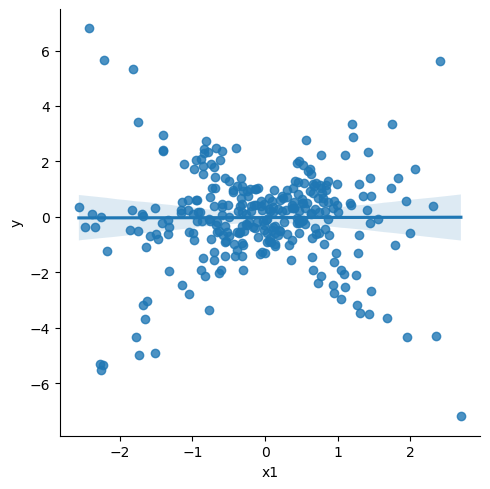

In [154]:
sns.lmplot(data=dfC, y='y', x='x1')

### 4f)

You have visually explored the relationship between the output and EACH input. The previous plots did NOT include BOTH inputs. However, you already know strategies to visually explore if the CATEGORICAL input influences the RELATIONSHIP between the continuous output and numeric input.

Create a TREND PLOT between the CONTINUOUS output `y` and the NUMERIC input which ACCOUNTS for the influence of the CATEGORICAL input.

#### 4f) - SOLUTION

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


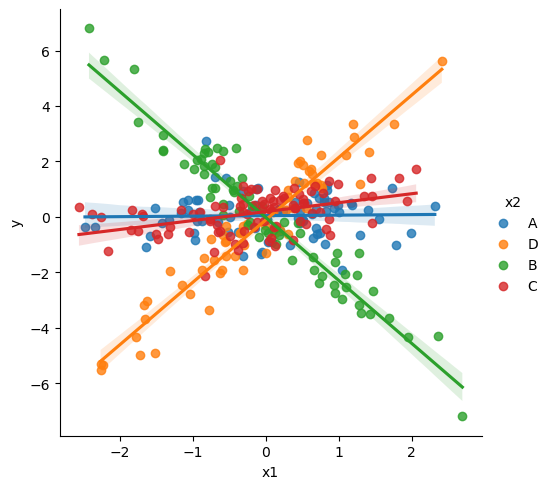

In [155]:
sns.lmplot(data=dfC, y='y', x='x1', hue='x2')

### 4g)

Now that you have some idea about the output to input relationships, let's quantify those effects by fitting a linear model. You will fit a linear model that uses includes INTERACTIONS between BOTH inputs. Thus, you do not need to fit models with a single input in this problem. You will use BOTH inputs.

Fit a linear model that involves the LINEAR **main effects** AND the INTERACTION between BOTH inputs. Assign the fitted model to the `fit_C` object.

Display the COEFFICIENT PLOT associated with `fit_C`.

#### 4g) - SOLUTION

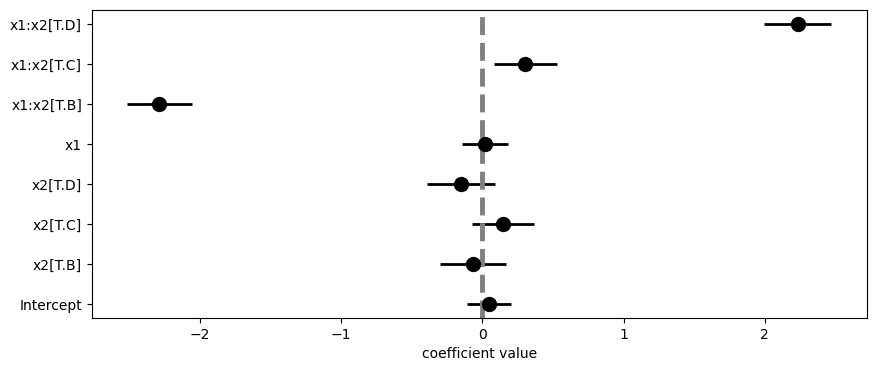

In [156]:
fit_C = smf.ols(formula='y ~ x1 * x2', data=dfC).fit()
my_coefplot(fit_C)

### 4h)

How many coefficients were estimated for the model that included **main effects** AND INTERACTIONS between for BOTH inputs in the previous problem?

What conclusions can you draw from the COEFFICIENT plot? Are your conclusions consistent with your visualization in 4f)?

#### 4h) - SOLUTION

What do you think?

8 coefficients were estimated for the model.

The intercept, x2[T.B],x2[T.C], x2[T.D] and x1 estimations are not statistically significant.

It is consistent, since some of the interations between x1 and x2 are statistically significant, which corresponds to the non parallel lines in the trend plot.

### 4i)

Let's use predictions to help confirm your statements in 4h). As in the previous problem, you must begin by defining a NEW data set. This data set will treat the NUMERIC (continuous) input as the primary input with the most unique values. The CATEGORICAL input will serve as the secondary input. The NEW data set must include ALL unique values of the CATEGORICAL input.  

Create a NEW Pandas DataFrame, `dfC_viz`, that contains a two columns with the SAME names as the INPUTS in `dfC`. The NUMERIC (continuous) input must consist of 101 evenly spaced values between the TRAINING set MINIMUM and training set MAXIMUM NUMERIC input values. The CATEGORICAL input must consist of ALL unique values associated with the CATEGORICAL (non-numeric) input. Thus, the CATEGORICAL input is NOT constant! Remember that the training set is contained in the `dfC` DataFrame.

Display the `.nunique()` method associated with `dfC_viz` to the screen to confirm it was created correctly.

#### 4i) - SOLUTION

In [157]:
dfC_viz = pd.DataFrame(
    [ (x1, x2) for x1 in np.linspace(dfC.x1.min(), dfC.x1.max(), 101)
                for x2 in dfC.x2.unique()],
    columns=['x1','x2']
)

dfC_viz.nunique()

x1    101
x2      4
dtype: int64

### 4j)

You will make predictions for the AVERAGE OUTPUT (TREND) on the NEW `dfC_viz` data using the `fit_C` model. The UNCERTAINTY INTERVAL bounds are not required for this problem. Therefore, the predictive TREND can be added as a new column to a DataFrame. 

Create a COPY of the `dfC_viz` DataFrame named `dfC_viz_copy`. Create a NEW column named `pred` within `dfC_viz_copy` that is assigned the predictive TREND on the NEW `dfC_viz` data using the `fit_C` model.

Display the head of `dfC_viz_copy` object to the screen to confirm it is created correctly.

#### 4j) - SOLUTION

In [158]:
df_C_viz_copy = dfC_viz.copy()
df_C_viz_copy['pred'] = fit_C.predict(dfC_viz)
df_C_viz_copy.head()

,x1,x2,pred
0,-2.562362,A,-0.000926
1,-2.562362,D,-5.869797
2,-2.562362,B,5.791143
3,-2.562362,C,-0.634550
4,-2.509802,A,0.000042


### 4k)

You now have everything necessary to visualize the predictions of the `fit_C` model on the NEW data, `dfC_viz`! You must visualize the predictive trend with respect to the NUMERIC (continuous) input for each unique value of the CATEGORICAL (non-numeric) input.

You must create the visualization as a LINE chart using Seaborn. The lines must be COLORED by the CATEGORICAL (non-numeric) input. You may use the default color palette. You must set the appropriate arguments to ensure ALL lines are shown.

#### 4k) - SOLUTION

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

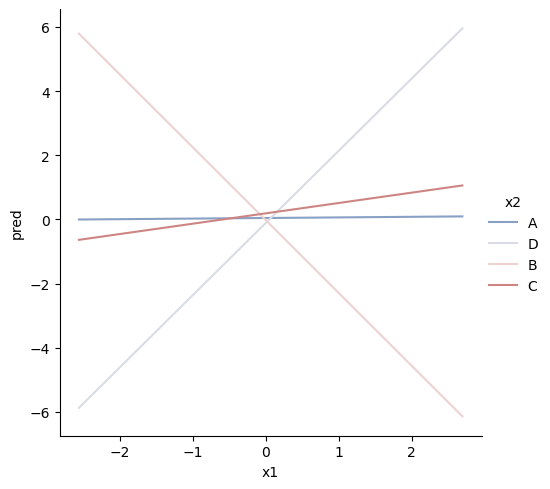

In [160]:
sns.relplot(data = df_C_viz_copy,
            x='x1', y='pred', kind='line',
            hue='x2', palette='vlag',
            estimator=None, units='x2')

### 4l)

Were the "lines" visualized in 4k) consistent with your COEFFICIENT PLOT in 4g) and the colored TREND PLOT in 4g)?

Based on those visualizations, what conclusions can you draw from INTERACTING a CATEGORICAL input with a CONTINUOUS input?

#### 4l) - SOLUTION

What do you think?

It is consistent with 4g, and therefore consistent with the coeeficient plot.

If we have a interaction relationship between inputs, we would not have parallel lines in the trend plot.

## Problem 05

Regression is an important modeling task, but it is NOT the only type of modeling application! Another very important predictive modeling application is **BINARY CLASSIFICATION** which has the goal of CLASSIFYING a CATEGORICAL OUTPUT into one of two CATEGORIES. However, you will often find that the BINARY OUTCOME (output) is **encoded** as an integer where a value of 1 corresponds to the EVENT of interest and a value of 0 denotes the NON-EVENT (the other category). It is therefore paramount to use the appropriate modeling functions that will correctly treat the BINARY OUTCOME as a CATEGORICAL variable even though the output is denoted as an integer!

This problem introduces you to these issues and gives you practice working with the modeling functions. The data for the problem involves a single input named `x` and the BINARY OUTCOME you wish to classify is named `y`.

### 5a)

Read in the `hw09_probD.csv` CSV file and assign it to the `dfD` object.

Apply the `.info()` method to display useful information associated with the columns in the data set.

What is the data type of the BINARY OUTCOME?

#### 5a) - SOLUTION

In [162]:
dfD = pd.read_csv('./hw09_probD.csv')

### 5b)

Display the number of unique values associated with the BINARY OUTCOME. Is it in fact BINARY?

#### 5b) - SOLUTION

In [163]:
dfD.nunique()

x    155
y      2
dtype: int64

Yes, y value is binary.

### 5c)

As mentioned at the start of the assignment, you will NOT perform a detailed visual exploration of the data. However, let's practice using PLOTS that will specifically help you explore the potential influence of the input on the BINARY OUTCOME.

Let's start with the BINARY OUTCOME though. Create a bar chart that shows the counts for the BINARY OUTCOME. You must create the bar chart using Seaborn.

Are the categories roughly balanced?

#### 5c) - SOLUTION

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

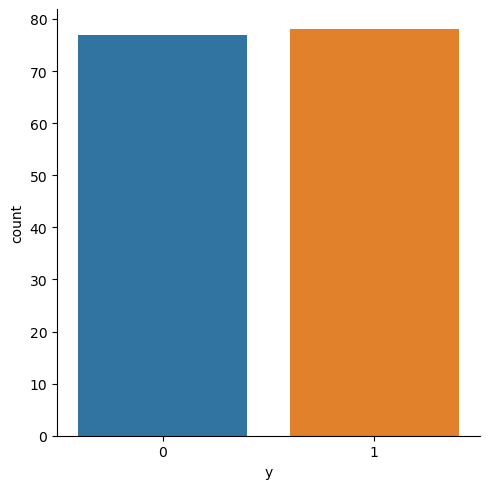

In [164]:
sns.catplot(data=dfD, x='y', kind='count')

Yes, the categories are roughly balanced.

### 5d)

Visualize the RELATIONSHIP between the BINARY OUTCOME and the CONTINUOUS input using a TREND PLOT. You **must** use the DEFAULT arguments for the TREND PLOT and therefore you will create the INCORRECT TREND!!!

#### 5d) - SOLUTION

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


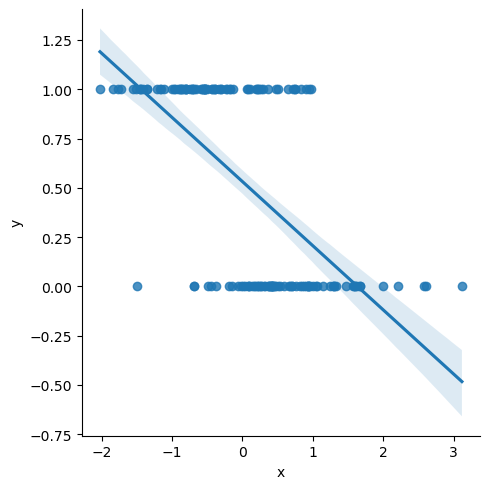

In [166]:
sns.lmplot(data=dfD, y='y', x='x')

### 5e)

Visualize the RELATIONSHIP between the BINARY OUTCOME and the CONTINUOUS input again using a TREND PLOT. However, this time CHANGE the arguments to the TREND PLOT function so that a LOGISTIC REGRESSION trend line is used instead of the DEFAULT LINEAR REGRESSION trend line. You are therefore creating the CORRECT TREND PLOT for the BINARY OUTCOME.

#### 5e) - SOLUTION

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


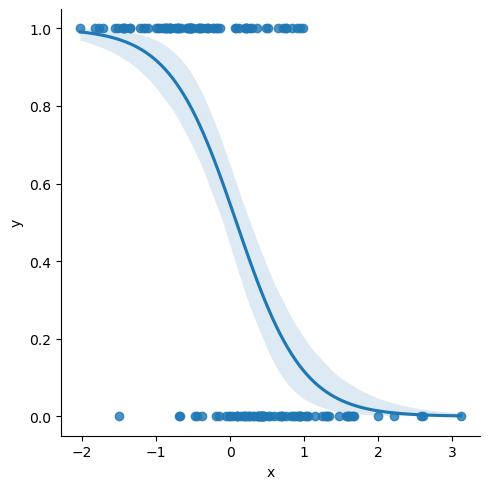

In [167]:
sns.lmplot(data=dfD, y='y', x='x', logistic=True)

### 5f)

Look closely at the figures in 5d) and 5e). How does the TREND PLOT in 5d) reveal that it is INCORRECT for this BINARY CLASSIFICATION application?

#### 5f) - SOLUTION

What do you think?

The y value range should between 0 and 1, but the trend plot in 5d is not.

### 5g)

Let's now fit a LOGISTIC REGRESSION for this BINARY CLASSIFICATION task. As discussed in the lecture recordings, LOGISTIC REGRESSION does NOT model the AVERAGE OUTPUT directly. Instead, the model is applied to the LOG-ODDS RATIO. 

You must use the CORRECT statsmodels function to fit a LOGISTIC REGRESSION model that LINEARLY relates the CONTINUOUS input to the LOG-ODDS RATIO.

Assign the fitted model to the `fit_D` object.

Print the `.summary()` method associated with the `fit_D` object to the screen.

#### 5g) - SOLUTION

In [168]:
fit_D = smf.logit(formula='y ~ x', data=dfD).fit()
print(fit_D.summary())

Optimization terminated successfully.
         Current function value: 0.446362
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  155
Model:                          Logit   Df Residuals:                      153
Method:                           MLE   Df Model:                            1
Date:                Fri, 10 Nov 2023   Pseudo R-squ.:                  0.3560
Time:                        21:19:30   Log-Likelihood:                -69.186
converged:                       True   LL-Null:                       -107.43
Covariance Type:            nonrobust   LLR p-value:                 2.206e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1873      0.213      0.879      0.379      -0.230       0.605
x             -2.2223      0.

### 5h)

The printed summary table allows you to identify the CONTINUOUS input is considered statistically significant. However, let's visualize the coefficient summaries instead using the COEFFICIENT PLOT! This works because LOGISTIC REGRESSION is a **Generalized Linear Model (GLM)** and thus many of the concepts and interpretations we learned about with linear models apply to logistic regression!

Display the COEFFICIENT PLOT associated with `fit_D`. Is the CONTINUOUS input considered STATISTICALLY SIGNIFICANT using the conventional thresholds?

#### 5h) - SOLUTION

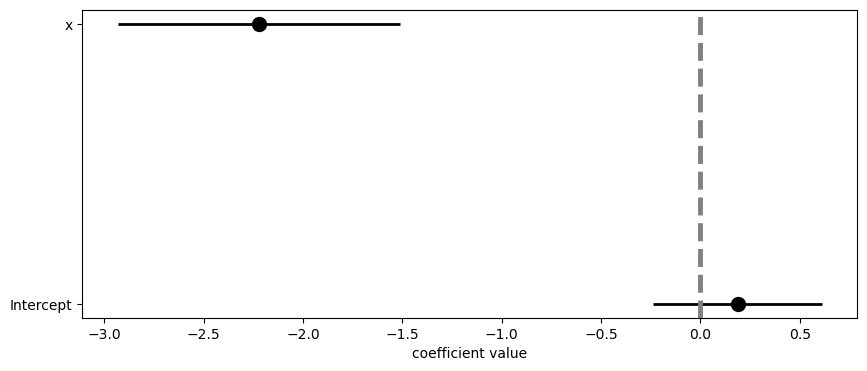

In [169]:
my_coefplot(fit_D)

The intercept is not considered statistically significant, but the continuous input is.

### 5i)

Let's conclude this problem by visualizing the PREDICTIONS from the LOGISTIC REGRESSION model, `fit_D`. As with the previous problems you must first create a NEW data set to support the visualization.

However, compared to the previous problems you will NOT base the BOUNDS of the NEW visualization data set based on the TRAINING set. Instead, you will use values well outside the training set. I do **NOT** recommend doing this for most applications. Predictive models are not truly intended for **extrapolation**. You will do this here to help your understanding with what's going on with the LOGISTIC REGRESSION model. Thus, the extrapolation is being done for teaching purposes.

Create a NEW Pandas DataFrame, `dfD_viz`, that contains a single column named `x`. This column must consist of 501 evenly spaced values between -7 and 7.

Display the `.nunique()` method associated with `dfD_viz` to the screen to confirm it was created correctly.

#### 5i) - SOLUTION

In [170]:
dfD_viz = pd.DataFrame(
    {'x': np.linspace(-7, 7, 501)}
)

dfD_viz.nunique()

x    501
dtype: int64

### 5j)

You will make predictions on the NEW `dfD_viz` data using the `fit_D` model. You are NOT including UNCERTAINTY INTERVAL bounds with the predictions and thus the predictions can be added as a new column to a DataFrame.

Create a COPY of the `dfD_viz` DataFrame named `dfD_viz_copy`. Create a NEW column named `pred` within `dfD_viz_copy` that is assigned the prediction on the NEW `dfD_viz` data using the `fit_D` model.

Display the head of `dfD_viz_copy` object to the screen to confirm it is created correctly.

#### 5j) - SOLUTION

In [171]:
df_D_viz_copy = dfD_viz.copy()
df_D_viz_copy['pred'] = fit_D.predict(dfD_viz)
df_D_viz_copy.head()

,x,pred
0,-7.000,1.0
1,-6.972,1.0
2,-6.944,1.0
3,-6.916,1.0
4,-6.888,1.0


### 5k)

Create a LINE chart using Seaborn to visualize the PREDICTIONS from `fit_D` on the NEW `dfD_viz` data with respect to the CONTINUOUS input.

#### 5k) - SOLUTION

c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sopuser\anaconda3\envs\PSP\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

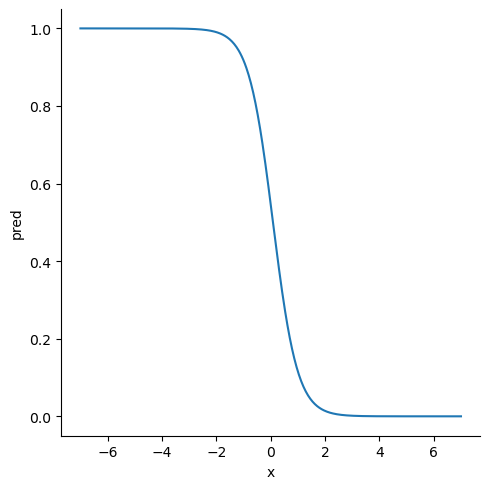

In [172]:
sns.relplot(data = df_D_viz_copy,
            x='x', y='pred', kind='line')

### 5l)

Are the PREDICTIONS from `fit_D` consistent with the COEFFICIENT PLOT displayed in 5h)?

#### 5l) - SOLUTION

What do you think?

Yes it is, it is a negative slope, which has the larger prediction when x is smaller.

### 5m)

Why are the PREDICTIONS from `fit_D` **not** a STRAIGHT LINE even though you used a formula that involved a LINEAR RELATIONSHIP with the CONTINUOUS input? 

#### 5m) - SOLUTION

What do you think?

This is because it is a logistic regression. By default, the logistic regression is a sigmoid function, which is not a straight line.